# 1. Load data

In [2]:
import pandas as pd
import plotly.express as px
import geopandas as gpd
import matplotlib.pyplot as plt

all_birds = pd.read_csv('F:\\Python_projects\\state_of_birds_india\\birds_vis\\all_birds.csv')
ind_adm1 = gpd.read_file('F:\\Python_projects\\state_of_birds_india\\birds_vis\\IND_adm1.gpkg')
india = ind_adm1.to_crs(epsg='24378')

In [3]:
print(set(all_birds['CITES Appendix']))
print(set(all_birds['Endemicity']))
print(set(all_birds['IUCN Category']))
print(set(all_birds['Habitat Specialization']))
print(set(all_birds['SoIB 2023 Priority Status']))

{nan, 'Appendix II', 'Appendix I'}
{'Northern Myanmar Lowlands', 'Andaman and Nicobar Islands', 'Andaman Islands', 'Nicobar Islands', 'Western Ghats', 'Eastern Himalayas', 'Himalayas', 'Assam Plains', 'Non-endemic', 'Western Ghats & Sri Lanka', 'Indus Plains', 'Southern Deccan Plateau', 'Western Himalayas', 'Eastern Andhra Pradesh', 'Central India', 'Indian Subcontinent', 'Mainland India'}
{'Critically Endangered', 'Near Threatened', 'Least Concern', 'Vulnerable', 'Not Recognised', 'Endangered'}
{'Alpine & Cold Desert', 'Forest & Plantation', 'Grassland', 'Forest', 'Open Habitat', 'Grassland & Scrub', 'Wetland', 'Non-specialized'}
{'Low', 'Moderate', 'High'}


## Visualize table 5

In [4]:
tab5 = all_birds.groupby(['IUCN Category', 'SoIB 2023 Priority Status']).count().reset_index()
#define function for the custom sort
iucn_order = ['Critically Endangered', 'Endangered', 'Vulnerable', 'Near Threatened', 'Least Concern', 'Not Recognised']
soib_order = ['High', 'Moderate', 'Low']

tab5['IUCN Category'] = pd.Categorical(tab5['IUCN Category'], categories=iucn_order, ordered=True)
tab5['SoIB 2023 Priority Status'] = pd.Categorical(tab5['SoIB 2023 Priority Status'], categories=soib_order, ordered=True)

# Sort the DataFrame based on col1 and col2
result_sorted = tab5.sort_values(by=['IUCN Category', 'SoIB 2023 Priority Status']).reset_index(drop=True)
result_sorted.head(3)


,IUCN Category,SoIB 2023 Priority Status,Unnamed: 0,English Name,Scientific Name,Order,Family,Endemicity,Habitat Specialization,CITES Appendix,source
0,Critically Endangered,High,115,115,115,115,115,115,115,91,115
1,Endangered,High,122,122,122,122,122,122,122,49,122
2,Endangered,Low,26,26,26,26,26,26,26,26,26


In [5]:
#map CR and high status
cr_high = all_birds[(all_birds['IUCN Category'] == 'Critically Endangered') & (all_birds['SoIB 2023 Priority Status'] == 'High')]

#list of such species
cr_high_species= cr_high.loc[:, ~cr_high.columns.isin(['source', 'Unnamed: 0'])]
cr_high_species = cr_high_species.drop_duplicates()
print('List of Critically Endangered and High priority bird species = ', '\n', cr_high_species['English Name'])
#no of species classified as Critically Endangered and High status
print( 'no of species classified as Critically Endangered and High status = ' , len(cr_high_species))


#map EN and high status
en_high = all_birds[(all_birds['IUCN Category'] == 'Endangered') & (all_birds['SoIB 2023 Priority Status'] == 'High')]

#list of such species
en_high_species= en_high.loc[:, ~en_high.columns.isin(['source', 'Unnamed: 0'])]
en_high_species = en_high_species.drop_duplicates()
print('List of Endangered and High priority bird species = ', '\n', en_high_species['English Name'])
#no of species classified as Critically Endangered and High status
print( 'no of species classified as Endangered and High status = ' , len(en_high_species))


#map EN and high status
en_low = all_birds[(all_birds['IUCN Category'] == 'Endangered') & (all_birds['SoIB 2023 Priority Status'] == 'Low')]

#list of such species
en_low_species= en_low.loc[:, ~en_low.columns.isin(['source', 'Unnamed: 0'])]
en_low_species = en_low_species.drop_duplicates()
print('List of Endangered and High priority bird species = ', '\n', en_low_species['English Name'])
#no of species classified as Critically Endangered and High status
print( 'no of species classified as Endangered and High status = ' , len(en_low_species))


List of Critically Endangered and High priority bird species =  
 244         Great Indian Bustard
245              Lesser Florican
318             Jerdon's Courser
370         White-rumped Vulture
371               Indian Vulture
663              Bengal Florican
731          White-bellied Heron
746           Red-headed Vulture
748       Slender-billed Vulture
1044             Bugun Liocichla
1200     Yellow-breasted Bunting
1223              Baer's Pochard
3919            Sociable Lapwing
12182            Himalayan Quail
Name: English Name, dtype: object
no of species classified as Critically Endangered and High status =  14
List of Endangered and High priority bird species =  
 59                   Great Knot
331          Black-bellied Tern
335              Indian Skimmer
366            Egyptian Vulture
623      White-winged Wood Duck
1017        Swamp Grass Babbler
1338           Greater Adjutant
1394        Pallas's Fish Eagle
1739              Finn's Weaver
1951               Sake

In [6]:
#Attach geometries to all tables
#cr_high
#en_high
#en_low
cr_high.head(2)

,Unnamed: 0,English Name,Scientific Name,SoIB 2023 Priority Status,Order,Family,Endemicity,Habitat Specialization,IUCN Category,CITES Appendix,source
244,46,Great Indian Bustard,Ardeotis nigriceps,High,Otidiformes,Otididae (Bustards),Indian Subcontinent,Grassland,Critically Endangered,Appendix I,Andhra Pradesh
245,47,Lesser Florican,Sypheotides indicus,High,Otidiformes,Otididae (Bustards),Indian Subcontinent,Grassland,Critically Endangered,Appendix II,Andhra Pradesh


In [29]:

state_wise = cr_high.groupby('source').count().reset_index()[['source', 'Unnamed: 0']]
result = pd.merge(india, state_wise, how='left', left_on='NAME_1', right_on='source')
#result['Unnamed: 0'].isna()
result['Unnamed: 0'].fillna(0, inplace=True)
result['Unnamed: 0'] = round(result['Unnamed: 0'], 0)
set(result['Unnamed: 0'])

{0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0}

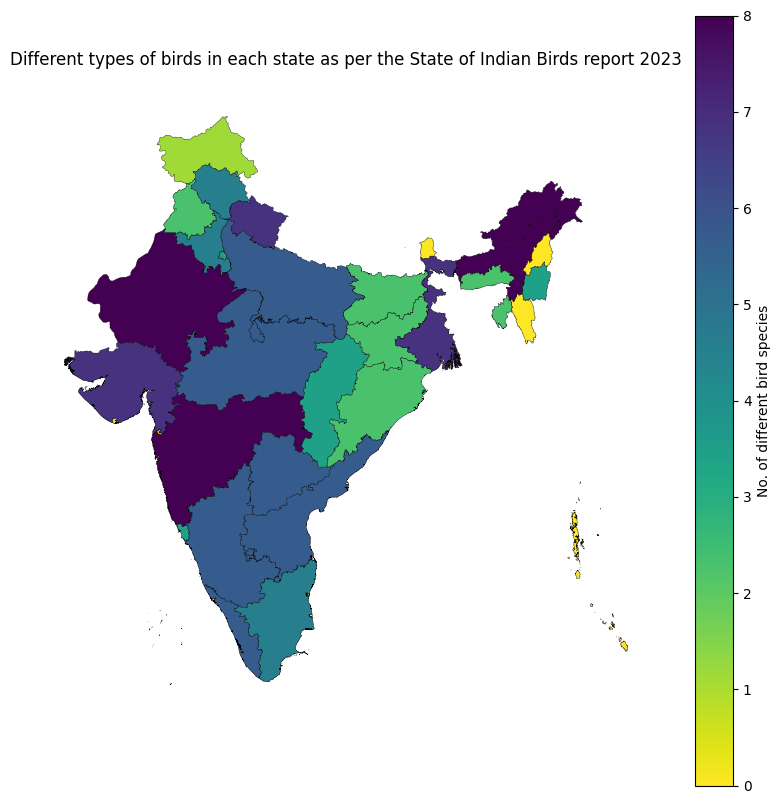

In [32]:
# Plot with color bar
fig, ax = plt.subplots(1, 1, figsize=(10, 10))

# Use a single color bar for the entire plot
cax = plt.cm.ScalarMappable(cmap='viridis_r')
cax.set_array([result['Unnamed: 0']])

n=len(set(result['Unnamed: 0']))-1
result.plot(column='Unnamed: 0', 
            scheme='quantiles', k=n, cmap='viridis_r', 
            edgecolor='black', linewidth=0.25, 
            ax=ax, cax=cax)

ax.set_title('Different types of birds in each state as per the State of Indian Birds report 2023')
ax.set_axis_off()
ax.autoscale()

# Set the color bar label
cax.set_clim(result['Unnamed: 0'].min(), result['Unnamed: 0'].max())
cbar = fig.colorbar(cax, ax=ax, format = '%0.0f')
cbar.set_label('No. of different bird species')

plt.show()




# plot 1

In [10]:
all_birds_raw = pd.read_csv('F:\\Python_projects\\state_of_birds_india\\India.csv')
all_birds_raw.head(2)

,English Name,Scientific Name,SoIB 2023 Priority Status,SoIB 2023 Long-term Trend Status,SoIB 2023 Current Annual Trend Status,SoIB 2023 Distribution Range Size Status,eBird English Name 2022,eBird Scientific Name 2022,BLI English Name 2022,BLI Scientific Name 2022,...,Range Coverage (Current),Range Coverage (2022),Grid Coverage Mean,Grid Coverage CI,Projected Decline in 3 Generations,Regional Red List Category,SoIB 2020 Concern Status,SoIB 2020 Long-term Trend Status,SoIB 2020 Current Annual Trend Status,SoIB 2020 Distribution Range Size Status
0,Fulvous Whistling Duck,Dendrocygna bicolor,Low,Insufficient Data,Trend Inconclusive,Moderate,Fulvous Whistling-Duck,Dendrocygna bicolor,Fulvous Whistling-duck,Dendrocygna bicolor,...,32.0,52.0,13.0,1.0,NaN,NaN,Low,Data Deficient,Uncertain,Moderate
1,Lesser Whistling Duck,Dendrocygna javanica,Low,Stable,Stable,Very Large,Lesser Whistling-Duck,Dendrocygna javanica,Lesser Whistling-duck,Dendrocygna javanica,...,38.0,58.0,10.0,0.0,NaN,NaN,Low,Stable,Moderate Decline,Very Large


# 2. Plot no. of species found in each state or union territory

In [2]:
state_wise = all_birds.groupby('source').count().reset_index()[['source', 'Unnamed: 0']]
result = pd.merge(india, state_wise, how='left', left_on='NAME_1', right_on='source')


In [38]:
fig_type = px.bar(result.sort_values(by='Unnamed: 0', ascending =True),  x ='Unnamed: 0', y= 'source',
                title= 'State-wise bird count',
                color = 'Unnamed: 0' , color_continuous_scale=['red','black'], text='Unnamed: 0')
#Axis titles
fig_type.update_layout(xaxis_title="Species count", yaxis_title='State')
#Remove colorbar
fig_type.update_coloraxes(showscale=False)
# Set the height of the figure to scale
fig_type.update_layout(height=800)
fig_type.show()

In [60]:
import mapclassify

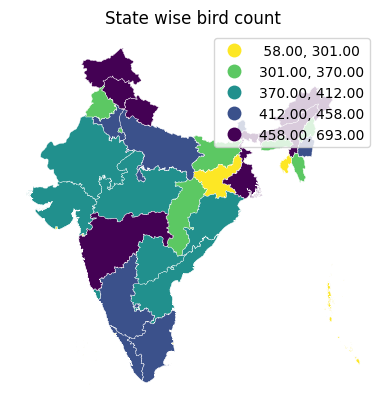

In [43]:
result['Unnamed: 0'] = round(result['Unnamed: 0'], 0)
ax = result.plot(column = 'Unnamed: 0', 
                scheme= 'quantiles', k=5, cmap='viridis_r', 
                legend = True, 
                edgecolor='white', linewidth=0.25)
ax.set_title('State wise bird count')
ax.set_axis_off()
ax.autoscale()
plt.show()


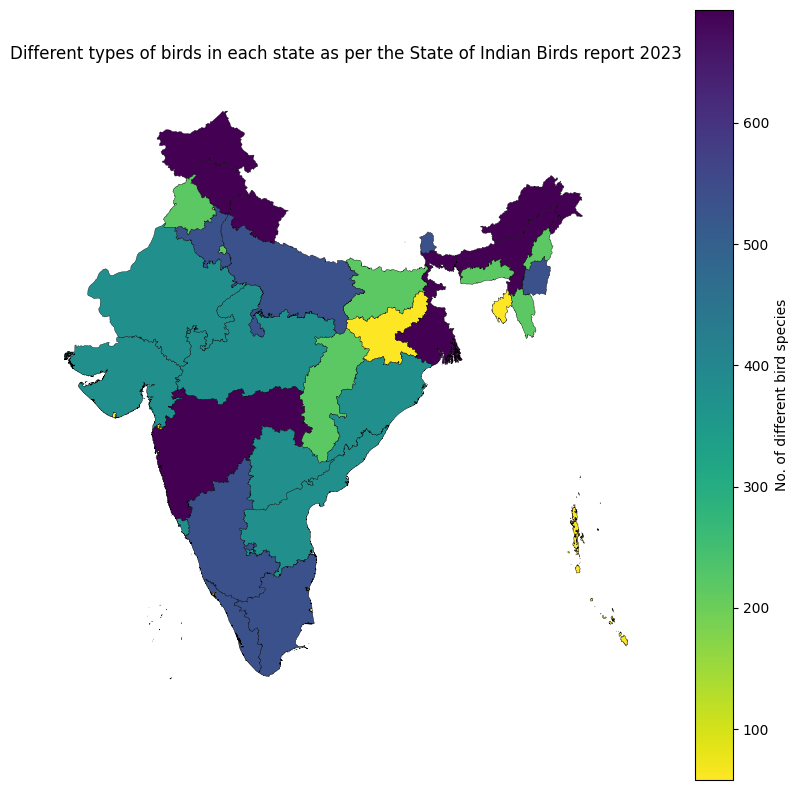

In [46]:

# Plot with color bar
fig, ax = plt.subplots(1, 1, figsize=(10, 10))

# Use a single color bar for the entire plot
cax = plt.cm.ScalarMappable(cmap='viridis_r')
cax.set_array(result['Unnamed: 0'])

result.plot(column='Unnamed: 0', 
            scheme='quantiles', k=5, cmap='viridis_r', 
            edgecolor='black', linewidth=0.25, 
            ax=ax, cax=cax)

ax.set_title('Different types of birds in each state as per the State of Indian Birds report 2023')
ax.set_axis_off()
ax.autoscale()

# Set the color bar label
cax.set_clim(result['Unnamed: 0'].min(), result['Unnamed: 0'].max())
cbar = fig.colorbar(cax, ax=ax, format = '%0.0f')
cbar.set_label('No. of different bird species')

plt.show()



write a function that takes IUCN state type and dispalys the same map as before

In [48]:
all_birds.head(2)

,Unnamed: 0,English Name,Scientific Name,SoIB 2023 Priority Status,Order,Family,Endemicity,Habitat Specialization,IUCN Category,CITES Appendix,source
0,0,Lesser Whistling Duck,Dendrocygna javanica,Low,Anseriformes,"Anatidae (Ducks, Geese, and Waterfowl)",Non-endemic,Wetland,Least Concern,NaN,Andaman and Nicobar Islands
1,1,Knob-billed Duck,Sarkidiornis melanotos,Low,Anseriformes,"Anatidae (Ducks, Geese, and Waterfowl)",Non-endemic,Wetland,Least Concern,Appendix II,Andaman and Nicobar Islands


In [52]:
def count_plot(df, col, type):
        #df: dataframe to use
        # #col: filter by which column
        # #type: filter for what in col
        
        #filter df by input parameters
        df2 = df[df[col]==type]
        
        #Join with gpkg
        state_wise = df2.groupby('source').count().reset_index()[['source', 'Unnamed: 0']]
        result = pd.merge(india, state_wise, how='left', left_on='NAME_1', right_on='source')
        
        #make plot
        
        # Plot with color bar
        fig, ax = plt.subplots(1, 1, figsize=(10, 10))
        
        # Use a single color bar for the entire plot
        cax = plt.cm.ScalarMappable(cmap='viridis_r')
        cax.set_array(result['Unnamed: 0'])
        
        result.plot(column='Unnamed: 0', 
                        scheme='quantiles', k=5, cmap='viridis_r', 
                        edgecolor='black', linewidth=0.25, 
                        ax=ax, cax=cax)
        
        ax.set_title('Different types of birds in each state as per the State of Indian Birds report 2023')
        ax.set_axis_off()
        ax.autoscale()
        
        # Set the color bar label
        cax.set_clim(result['Unnamed: 0'].min(), result['Unnamed: 0'].max())
        cbar = fig.colorbar(cax, ax=ax, format = '%0.0f')
        cbar.set_label('No. of different bird species')
        
        plt.show()
        


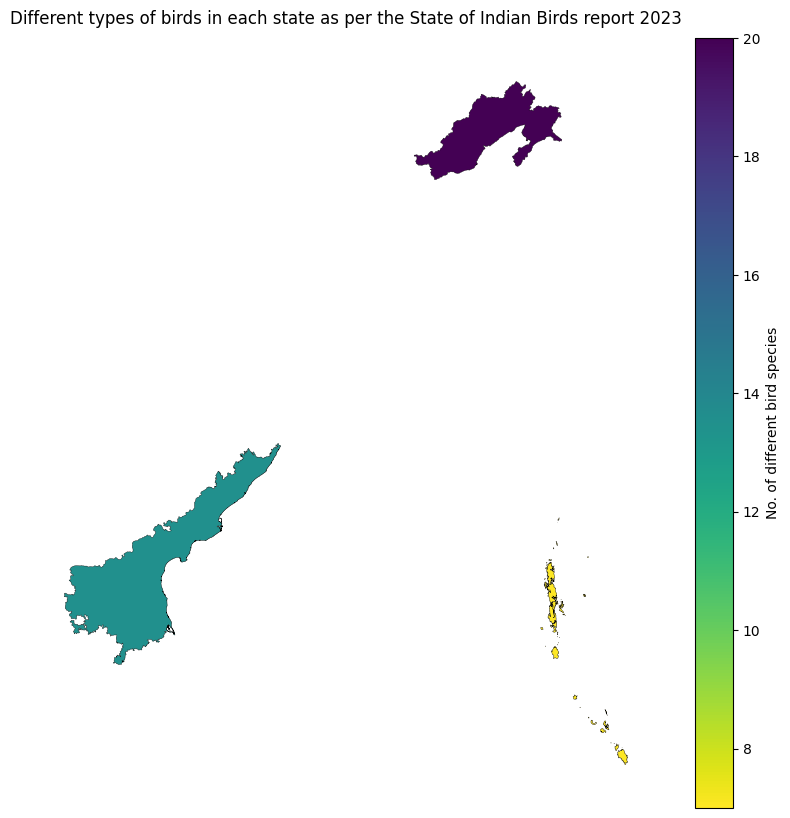

In [57]:
count_plot(all_birds.head(1000), col='Order', type='Anseriformes')

In [54]:
result.head(2)

,ID_1,NAME_1,ENGTYPE_1,geometry,source,Unnamed: 0
0,1,Andaman and Nicobar Islands,Union Territory,"MULTIPOLYGON (((5841541.754 -1637673.605, 5841...",Andaman and Nicobar Islands,198
1,2,Andhra Pradesh,State,"MULTIPOLYGON (((4139016.196 -1148993.573, 4139...",Andhra Pradesh,411
